In [6]:
!pip install tensorflow
import tensorflow as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

print("Tools loaded successfully!")


Tools loaded successfully!


In [10]:
print(tf.__version__)

2.20.0


In [13]:
data_dir = '../data/raw'

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,    
    horizontal_flip=True, 
    zoom_range=0.2,      
    validation_split=0.2  
)

print("Loading Training Data:")
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),  
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

print("Loading Validation Data:")
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Loading Training Data:
Found 1152 images belonging to 6 classes.
Loading Validation Data:
Found 288 images belonging to 6 classes.


In [15]:
# Create the model structure
model = Sequential()

# Layer 1: Look for simple features (edges)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2, 2)) # Shrink the map to save memory

# Layer 2: Look for shapes
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Layer 3: Look for complex defect patterns
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Flatten: Convert 2D maps to a 1D list for the decision layer
model.add(Flatten())

# Dense Layer: The "thinking" neurons
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) # Turn off 50% neurons randomly to prevent memorizing

# Output Layer: 6 neurons for the 6 defect classes
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Show the summary of what we just built
model.summary()

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,414 (12.61 MB)

 Trainable params: 3,305,414 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
print("Starting training... Please wait.")

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=15  # 15 rounds of learning
)

print("Training finished!")

Starting training... Please wait.
Epoch 1/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 490ms/step - accuracy: 0.2257 - loss: 1.7557 - val_accuracy: 0.3785 - val_loss: 1.5251
Epoch 2/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 552ms/step - accuracy: 0.4688 - loss: 1.3228 - val_accuracy: 0.5069 - val_loss: 1.1829
Epoch 3/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 462ms/step - accuracy: 0.6806 - loss: 0.9081 - val_accuracy: 0.9028 - val_loss: 0.4313
Epoch 4/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 444ms/step - accuracy: 0.7917 - loss: 0.6311 - val_accuracy: 0.8715 - val_loss: 0.4597
Epoch 5/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 459ms/step - accuracy: 0.7882 - loss: 0.6355 - val_accuracy: 0.8368 - val_loss: 0.4404
Epoch 6/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 493ms/step - accuracy: 0.8238 - loss: 0.4972 - val_accuracy: 0.8264 - val_loss: 0.5079
Epoch 7/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 430ms/step - accuracy: 0.8707 - loss: 0.4629 - val_accuracy: 0.9306 - val_loss: 0.2581
Epoch 8/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 462ms/step - accuracy

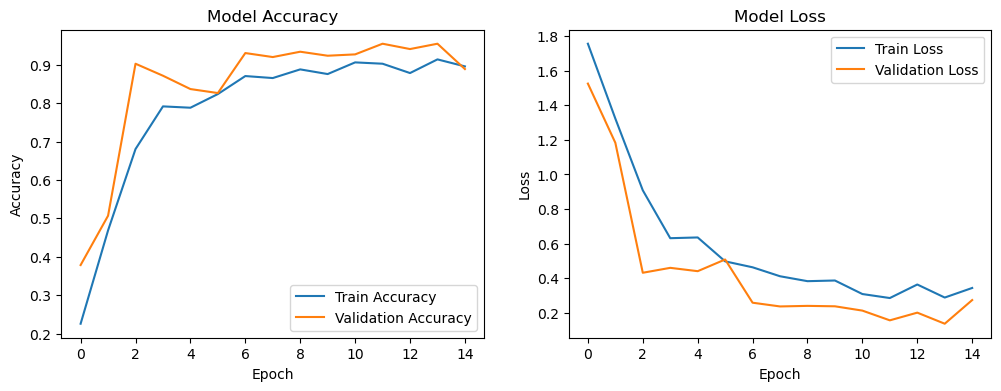

In [19]:
# Plot Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [21]:
# Ensure the directory exists
import os
if not os.path.exists('../saved_models'):
    os.makedirs('../saved_models')

# Save the model
model.save('../saved_models/defect_classifier.h5')
print("Model saved successfully as 'defect_classifier.h5'")

Model saved successfully as 'defect_classifier.h5'
